In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv('Admission_Predict.csv')

In [55]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
# Strip spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [65]:
# Drop unnecessary / target columns
X = df.drop(['Serial No','Chance of Admit'], axis=1)

In [67]:
y = df['Chance of Admit']

In [69]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [73]:
X.shape

(400, 7)

In [71]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [77]:
y.shape

(400,)

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [89]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 7)
X_test shape: (80, 7)
y_train shape: (320,)
y_test shape: (80,)


In [79]:
from sklearn.linear_model import LinearRegression

In [135]:
linear_model=LinearRegression()

In [137]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred = linear_model.predict(X_test)
y_pred

array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

In [141]:
from sklearn.metrics import classification_report,confusion_matrix

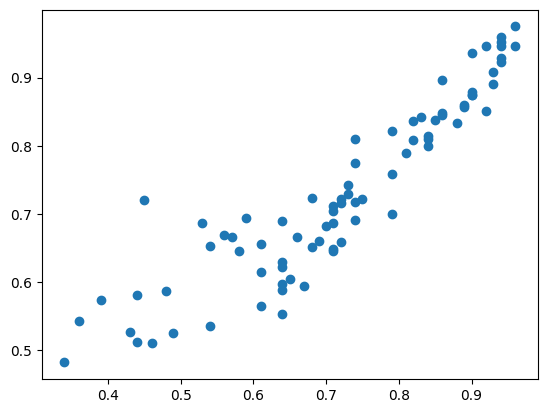

In [143]:
plt.scatter(y_test,y_pred)

C:\Users\Soni Jha\AppData\Local\Temp\ipykernel_23428\3449508103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predict),bins=50)


<Axes: xlabel='Chance of Admit', ylabel='Density'>

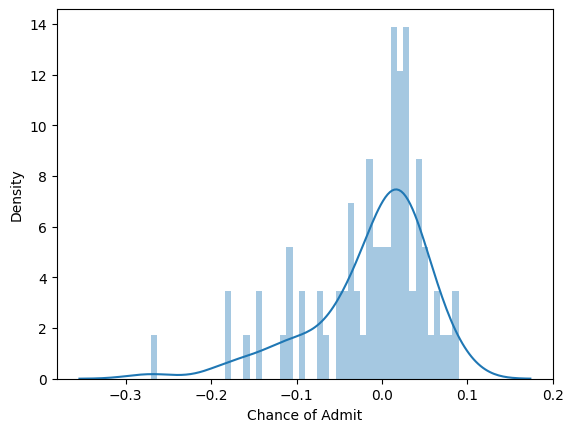

In [145]:
sns.distplot((y_test-predict),bins=50)

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [151]:
from sklearn.metrics import accuracy_score

In [153]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Squared Error: 0.004617003377285005
Root Mean Squared Error: 0.06794853476922813
Mean Absolute Error: 0.047956733620911976
R² Score: 0.8212082591486993


In [155]:
# Threshold at 0.7
y_true_class = (y_test >= 0.7).astype(int)
y_pred_class = (y_pred >= 0.7).astype(int)

accuracy = accuracy_score(y_true_class, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [157]:
import pickle

In [159]:
# Save model to a pickle file
with open("admission_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)